#Data Science & Business Analytics
#Task-1 GRIP INTERN Prediction using Supervised ML

# Data Preprocessing

### import supporting libraries

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for building piechart matplotlib provides piechart 
from matplotlib import rcParams

###loading the dataset 

In [ ]:

link="http://bit.ly/w-data"
df=pd.read_csv(link)
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###The features of the datset are study hours and percentage

###Here the independent variable is Study hours

###Checking file size

In [ ]:

df.shape

(25, 2)

###checking the datatype of the fetures

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###here we don't have null values

###to know features of the dataset

In [ ]:
 
df.columns

Index(['Hours', 'Scores'], dtype='object')

###checking for null values in data frame

In [ ]:


df.isnull().any()

Hours     False
Scores    False
dtype: bool

###statistical analysis


In [ ]:

df.describe()



,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.Hours.value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

# Data Visulaization

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


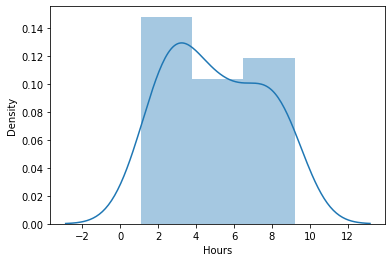

In [ ]:
sns.distplot(df.Hours)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


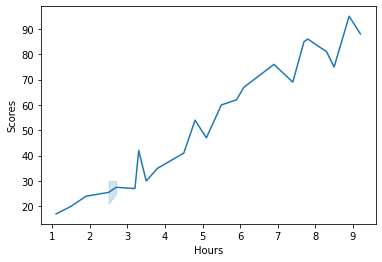

In [ ]:
sns.lineplot(df.Hours,df.Scores)

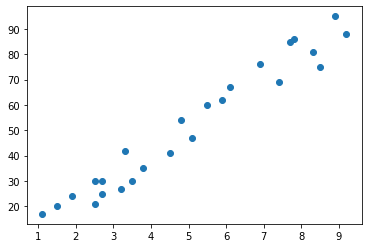

In [ ]:
plt.scatter(df.Hours,df.Scores)

In [ ]:
#to check correlation 

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###heatmaps are used for correlation 

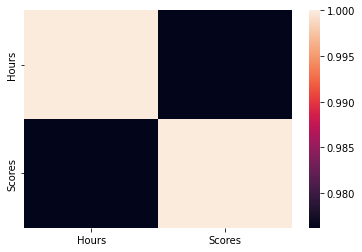

In [ ]:


sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


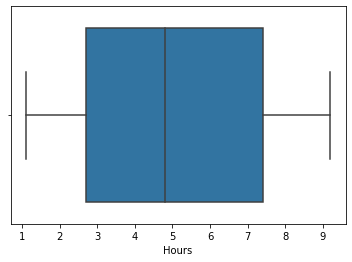

In [ ]:
sns.boxplot(df.Hours)

###There are no outliers for replacing
###Here there is no need for encoding 

# X and Y split

In [ ]:
X= df.drop(columns=['Scores'],axis=1)
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
y=df.Scores
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

###Machine Learning
###Model Building 
###This is regression
###Sklearn provides linear regression

###Train and Test split

In [ ]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(17, 1)

In [ ]:
x_test.shape

(8, 1)

###Model building 
###Taking regression Model

###import Model
###initialize Model
###Fitting model into training data
###Testing the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)


2.3708153823418883
[9.78856669]


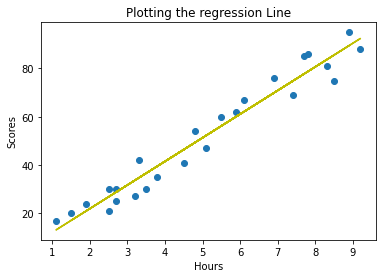

In [ ]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'y')
plt.title("Plotting the regression Line")
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

In [ ]:
model.predict(x_test)

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [ ]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
24    86
Name: Scores, dtype: int64

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [ ]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score =",own_pred)

No of Hours =  9.25
Predicted Score = [92.91505723]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###Evaluating the Model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651


In [94]:
import joblib
joblib.dump(model,"Students_Scores_Prediction.pkl")

['Students_Scores_Prediction.pkl']